In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_DS = df[df['job_title_short'].isin(['Data Analyst', 'Data Scientist'])].copy()


In [4]:
df_DA_DS['job_posted_month_num'] = df_DA_DS['job_posted_date'].dt.month

df_DA_DS


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_num
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",4
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']...",12
17,Data Scientist,Data Science Team Lead,"Laurel, MD",via APL Careers - Johns Hopkins University App...,Full-time,False,Georgia,2023-06-13 13:25:17,False,True,United States,None,NaN,NaN,Johns Hopkins Applied Physics Laboratory,"[go, apl, excel]","{'analyst_tools': ['excel'], 'programming': ['...",6
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau...",10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ...",1
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None,3
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"[aws, azure]","{'cloud': ['aws', 'azure']}",3
785725,Data Scientist,Analytics Engineer,Jerman,melalui Startup Jobs,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,Planet,"[sql, bigquery, gdpr, git, gitlab, github]","{'cloud': ['bigquery'], 'libraries': ['gdpr'],...",3


In [5]:
df_DA_DS_explode = df_DA_DS.explode('job_skills')

df_DA_DS_explode.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_num
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1


In [15]:
df_DA_DS_pivot = df_DA_DS_explode.pivot_table(index='job_posted_month_num', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_DS_pivot.loc['Total'] = df_DA_DS_pivot.sum()

df_DA_DS_pivot = df_DA_DS_pivot[df_DA_DS_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_DS_pivot = df_DA_DS_pivot.drop('Total')

df_DA_DS_pivot


job_skills,sql,python,r,excel,tableau,sas,power bi,aws,azure,spark,...,shogun,fastify,esquisse,mattermost,nuxt.js,wimi,gtx,suse,msaccess,capacitor
job_posted_month_num,,,,,,,,,,,,,,,,,,,,,
1,21147,20604,11173,10302,9042,7672,6033,4330,3870,3848,...,3,0,0,0,1,0,0,0,0,1
2,14547,14302,7640,7225,6502,5278,4576,2850,2703,2483,...,0,0,1,0,0,0,0,0,0,0
3,14242,13951,7621,7115,6507,5034,4449,2797,2614,2399,...,1,0,0,0,0,0,0,1,0,0
4,13823,13692,7272,6952,6223,5042,4339,2775,2497,2326,...,0,2,0,0,0,0,0,0,0,0
5,12200,12099,6321,5975,5516,4184,3895,2524,2169,2057,...,0,0,0,0,0,0,0,0,1,0
6,14057,14045,7461,7048,6244,4456,4692,2943,2654,2453,...,0,1,1,0,0,0,0,0,0,0
7,14365,14231,7473,6938,6475,4418,4775,2985,2794,2385,...,0,0,0,0,0,0,1,0,0,0
8,16849,16769,9064,8277,7546,5660,5425,3495,3165,2967,...,0,0,0,0,0,0,0,0,0,0
9,12577,12622,6299,6238,5508,4104,4216,2640,2525,2192,...,0,0,0,1,0,0,0,0,0,0


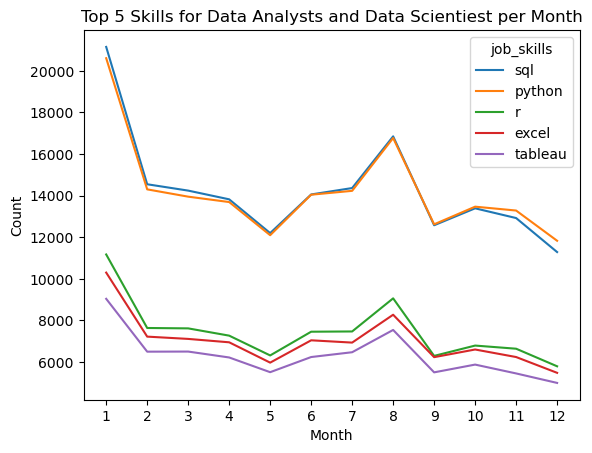

In [20]:
df_DA_DS_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Skills for Data Analysts and Data Scientiest per Month')
plt.ylabel('Count')
plt.xlabel('Month')
plt.xticks(ticks=range(len(df_DA_DS_pivot.index)), labels=df_DA_DS_pivot.index, rotation=0)
plt.show()